# Sentiment Classification & How To "Frame Problems" for a Neural Network

by Andrew Trask

- **Twitter**: @iamtrask
- **Blog**: http://iamtrask.github.io

### What You Should Already Know

- neural networks, forward and back-propagation
- stochastic gradient descent
- mean squared error
- and train/test splits

### Where to Get Help if You Need it
- Re-watch previous Udacity Lectures
- Leverage the recommended Course Reading Material - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) (40% Off: **traskud17**)
- Shoot me a tweet @iamtrask


### Tutorial Outline:

- Intro: The Importance of "Framing a Problem"


- Curate a Dataset
- Developing a "Predictive Theory"
- **PROJECT 1**: Quick Theory Validation


- Transforming Text to Numbers
- **PROJECT 2**: Creating the Input/Output Data


- Putting it all together in a Neural Network
- **PROJECT 3**: Building our Neural Network


- Understanding Neural Noise
- **PROJECT 4**: Making Learning Faster by Reducing Noise


- Analyzing Inefficiencies in our Network
- **PROJECT 5**: Making our Network Train and Run Faster


- Further Noise Reduction
- **PROJECT 6**: Reducing Noise by Strategically Reducing the Vocabulary


- Analysis: What's going on in the weights?

# Lesson: Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r') # What we know!
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r') # What we WANT to know!
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

# Lesson: Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)
pretty_print_review_and_label(5297)
pretty_print_review_and_label(4998)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...
NEGATIVE	:	if you haven  t seen this  it  s terrible . it is pure trash . i saw this about ...
POSITIVE	:	this schiffer guy is a real genius  the movie is of excellent quality and both e...


# Project 1: Quick Theory Validation

In [6]:
from collections import Counter
import numpy as np

In [7]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [9]:
for i in range(len(reviews)):
    if(labels[i] == 'POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word] += 1
            total_counts[word] += 1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

In [10]:
positive_counts.most_common()

[('', 1100936),
 ('the', 346648),
 ('.', 319308),
 ('and', 179444),
 ('a', 167376),
 ('of', 153710),
 ('to', 133492),
 ('is', 114490),
 ('in', 100430),
 ('br', 98470),
 ('it', 96050),
 ('i', 81486),
 ('that', 71260),
 ('this', 70160),
 ('s', 67630),
 ('as', 52616),
 ('with', 46494),
 ('for', 44832),
 ('was', 43834),
 ('film', 41874),
 ('but', 41644),
 ('movie', 38148),
 ('his', 34454),
 ('on', 34016),
 ('you', 33362),
 ('he', 32564),
 ('are', 29614),
 ('not', 28544),
 ('t', 27440),
 ('one', 27310),
 ('have', 25174),
 ('be', 24832),
 ('by', 23994),
 ('all', 23884),
 ('who', 22928),
 ('an', 22588),
 ('at', 22468),
 ('from', 21534),
 ('her', 20948),
 ('they', 19790),
 ('has', 18372),
 ('so', 18308),
 ('like', 18076),
 ('about', 16626),
 ('very', 16610),
 ('out', 16268),
 ('there', 16114),
 ('she', 15558),
 ('what', 15474),
 ('or', 15464),
 ('good', 15440),
 ('more', 15042),
 ('when', 14912),
 ('some', 14882),
 ('if', 14570),
 ('just', 14304),
 ('can', 14002),
 ('story', 13560),
 ('time', 

In [11]:
pos_neg_ratios = Counter()

for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

for word,ratio in pos_neg_ratios.most_common():
    if(ratio > 1):
        pos_neg_ratios[word] = np.log(ratio)
    else:
        pos_neg_ratios[word] = -np.log((1 / (ratio+0.01)))

In [12]:
# words most frequently seen in a review with a "POSITIVE" label
pos_neg_ratios.most_common()

[('edie', 5.3844950627890888),
 ('antwone', 5.1704839950381514),
 ('din', 5.0998664278241987),
 ('gunga', 4.8828019225863706),
 ('goldsworthy', 4.8675344504555822),
 ('gypo', 4.7874917427820458),
 ('yokai', 4.7874917427820458),
 ('visconti', 4.6249728132842707),
 ('flavia', 4.6249728132842707),
 ('paulie', 4.3652195163575005),
 ('gundam', 3.6054978451748854),
 ('iturbi', 3.5648268054439574),
 ('felix', 3.2580965380214821),
 ('capote', 3.1945831322991562),
 ('excellently', 3.1612467120315646),
 ('fido', 3.1416861861770706),
 ('deanna', 3.1090609588609941),
 ('hayworth', 3.1090609588609941),
 ('vance', 3.077970371790963),
 ('kolchak', 3.0647251450409425),
 ('sammo', 3.0349529867072724),
 ('laputa', 3.0155349008501706),
 ('sox', 2.9667447366807385),
 ('alvin', 2.9519296508955981),
 ('biko', 2.9385738597140425),
 ('polanski', 2.9103724246028344),
 ('mathieu', 2.9061201148643039),
 ('matthau', 2.8638801424491884),
 ('gilliam', 2.8581108956779433),
 ('chavez', 2.7725887222397811),
 ('harriet

In [13]:
# words most frequently seen in a review with a "NEGATIVE" label
list(reversed(pos_neg_ratios.most_common()))[0:30]

[('boll', -4.0763882786651227),
 ('uwe', -3.9194396030831955),
 ('thunderbirds', -3.6397022181378524),
 ('beowulf', -3.6295196084548165),
 ('dahmer', -3.5511512728628007),
 ('wayans', -3.5131804380804752),
 ('seagal', -3.3178813486436498),
 ('gamera', -3.0783307970967213),
 ('dreck', -3.0320527378989506),
 ('unwatchable', -3.0231580865348979),
 ('stinker', -2.9836231447642416),
 ('mst', -2.7729386376804541),
 ('incoherent', -2.7609457389729286),
 ('flimsy', -2.7480279574971846),
 ('dillinger', -2.667782815794761),
 ('yawn', -2.6571141133625016),
 ('unfunny', -2.5527880775662997),
 ('waste', -2.490427936954779),
 ('ugh', -2.4841729740397565),
 ('turd', -2.4841729740397565),
 ('blah', -2.4451592049923065),
 ('slugs', -2.4341766208007418),
 ('tripe', -2.3777546363727264),
 ('horrid', -2.3674337397349707),
 ('wtf', -2.3641029707876955),
 ('pointless', -2.3441458135812723),
 ('atrocious', -2.3162514610431946),
 ('damme', -2.2993644782940037),
 ('redeeming', -2.2652667164185862),
 ('prom', -

# Transforming Text into Numbers

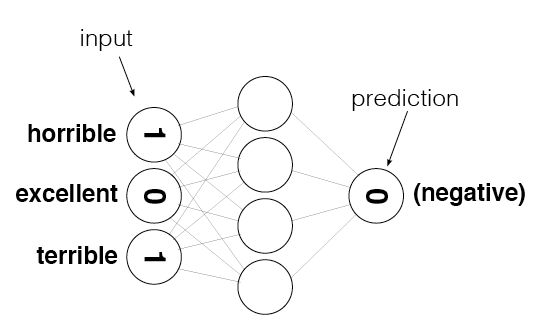

In [14]:
from IPython.display import Image

review = "This was a horrible, terrible movie."

Image(filename='sentiment_network.png')

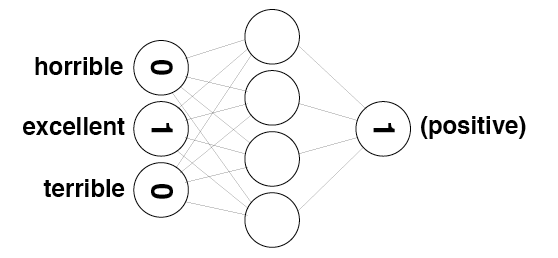

In [15]:
review = "The movie was excellent"

Image(filename='sentiment_network_pos.png')

# Project 2: Creating the Input/Output Data

In [16]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


In [17]:
list(vocab)

['',
 'passageways',
 'thisworld',
 'gorge',
 'thespic',
 'innocous',
 'lying',
 'caca',
 'appoints',
 'schulberg',
 'adoptee',
 'rift',
 'trainee',
 'fieldsian',
 'dipaolo',
 'mockable',
 'christy',
 'snag',
 'pendanski',
 'assassinate',
 'sweeties',
 'leatherface',
 'zombiez',
 'situational',
 'destructs',
 'holographic',
 'excitingly',
 'thrush',
 'nastie',
 'cavalcades',
 'curiousity',
 'iranians',
 'dennings',
 'weather',
 'sins',
 'doqui',
 'concepts',
 'jeopardizing',
 'overpraise',
 'sprinkles',
 'planter',
 'shacks',
 'sully',
 'adobe',
 'stagger',
 'dhupia',
 'estela',
 'unwelcomed',
 'mauritania',
 'actualize',
 'shoehorned',
 'inhabit',
 'ann',
 'mediocrities',
 'braintrust',
 'tribune',
 'villechaize',
 'jells',
 'dykes',
 'allies',
 'welcomes',
 'beatific',
 'banker',
 'carnage',
 'lining',
 'funicello',
 'nuff',
 'readily',
 'hoi',
 'thsi',
 'beaver',
 'gulfax',
 'incubator',
 'kf',
 'vagueness',
 'reelers',
 'monasteries',
 'torpedos',
 'weide',
 'lima',
 'rotld',
 'tok

In [18]:
import numpy as np

layer_0 = np.zeros((1,vocab_size))
layer_0

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

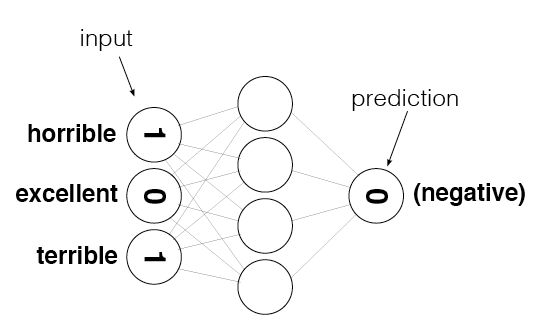

In [19]:
from IPython.display import Image
Image(filename='sentiment_network.png')

In [20]:
word2index = {}

for i,word in enumerate(vocab):
    word2index[word] = i
word2index

{'': 0,
 'passageways': 1,
 'thisworld': 2,
 'gorge': 3,
 'thespic': 4,
 'innocous': 5,
 'lying': 6,
 'caca': 7,
 'appoints': 8,
 'schulberg': 9,
 'adoptee': 10,
 'rift': 11,
 'trainee': 12,
 'fieldsian': 13,
 'dipaolo': 14,
 'mockable': 15,
 'christy': 16,
 'snag': 17,
 'pendanski': 18,
 'assassinate': 19,
 'sweeties': 20,
 'leatherface': 21,
 'zombiez': 22,
 'situational': 23,
 'destructs': 24,
 'holographic': 25,
 'excitingly': 26,
 'thrush': 27,
 'nastie': 28,
 'cavalcades': 29,
 'curiousity': 30,
 'iranians': 31,
 'dennings': 32,
 'weather': 33,
 'sins': 34,
 'doqui': 35,
 'concepts': 36,
 'jeopardizing': 37,
 'overpraise': 38,
 'sprinkles': 39,
 'planter': 40,
 'shacks': 41,
 'sully': 42,
 'adobe': 43,
 'stagger': 44,
 'dhupia': 45,
 'estela': 46,
 'unwelcomed': 47,
 'mauritania': 48,
 'actualize': 49,
 'shoehorned': 50,
 'inhabit': 51,
 'ann': 52,
 'mediocrities': 53,
 'braintrust': 54,
 'tribune': 55,
 'villechaize': 56,
 'jells': 57,
 'dykes': 58,
 'allies': 59,
 'welcomes': 6

In [21]:
def update_input_layer(review):
    
    global layer_0
    
    # clear out previous state, reset the layer to be all 0s
    layer_0 *= 0
    for word in review.split(" "):
        layer_0[0][word2index[word]] += 1

update_input_layer(reviews[0])

In [22]:
layer_0

array([[ 18.,   0.,   0., ...,   0.,   0.,   0.]])

In [23]:
def get_target_for_label(label):
    if(label == 'POSITIVE'):
        return 1
    else:
        return 0

In [24]:
labels[0]

'POSITIVE'

In [25]:
get_target_for_label(labels[0])

1

In [26]:
labels[1]

'NEGATIVE'

In [27]:
get_target_for_label(labels[1])

0

# Project 3: Building a Neural Network

- Start with your neural network from the last chapter
- 3 layer neural network
- no non-linearity in hidden layer
- use our functions to create the training data
- create a "pre_process_data" function to create vocabulary for our training data generating functions
- modify "train" to train over the entire corpus

### Where to Get Help if You Need it
- Re-watch previous week's Udacity Lectures
- Chapters 3-5 - [Grokking Deep Learning](https://www.manning.com/books/grokking-deep-learning) - (40% Off: **traskud17**)

In [29]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### TODO: Set self.activation_function to your implemented sigmoid function ####
        #
        # Note: in Python, you can define a function with a lambda expression,
        # as shown below.
        self.activation_function = lambda x : x  # Replace 0 with your sigmoid calculation.
        
        ### If the lambda code above is not something you're familiar with,
        # You can uncomment out the following three lines and put your 
        # implementation there instead.
        #
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    
    
    def train(self, inputs_list, targets_list):
        
        debug = False
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = self.weights_input_to_hidden.dot(inputs) # signals into hidden layer
        if debug:
            print ('hidden_inputs.shape')
            print (hidden_inputs.shape)
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        # TODO: Output error - Replace this value with your calculations.
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        
        # TODO: Backpropagated error - Replace these values with your calculations.
        hidden_errors = self.weights_hidden_to_output.T.dot(output_errors) # errors propagated to the hidden layer
        if debug:
            print ('hidden_errors.shape')
            print (hidden_errors.shape)
            print ('hidden_outputs.shape')
            print (hidden_outputs.shape)
        hidden_grad =  hidden_errors # hidden layer gradients
        
        # TODO: Update the weights - Replace these values with your calculations.
        if debug:
            print ('output_errors.shape')
            print (output_errors.shape)
            print ('final_inputs.shape')
            print (final_inputs.shape)
            print ('self.weights_hidden_to_output')
            print (self.weights_hidden_to_output)
        self.weights_hidden_to_output += output_errors * hidden_outputs.T * self.lr 
        # update hidden-to-output weights with gradient descent step
        if debug:
            print ('hidden_grad.shape')
            print (hidden_grad.shape)
            print ('np.outer(inputs.T, hidden_grad).shape')
            print (np.outer(inputs.T, hidden_grad).shape)
        # self.weights_input_to_hidden += (np.outer(inputs.T, hidden_grad) * self.lr).T
        self.weights_input_to_hidden += hidden_grad * inputs.T * self.lr 
        # update input-to-hidden weights with gradient descent step
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = self.weights_input_to_hidden.dot(inputs) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

In [30]:


def MSE(y, Y):
    return np.mean((y-Y)**2)



In [ ]:
import sys

### Set the hyperparameters here ###
epochs = 400
learning_rate = 0.1
hidden_nodes = 16
output_nodes = 1

N_i = vocab_size
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(range(N_i), size=128)
    for record, target in zip(reviews, 
                              labels):
        global layer_0
        update_input_layer(review.lower())
        record = layer_0
        target = get_target_for_label(target)
        network.train(record, target)

    # decrease learning rate if train_loss platau
    if e >= 10:
        train_loss = losses['train']
        if np.abs(train_loss[-1] - train_loss[-2]) <= learning_rate:
            if np.abs(train_loss[-2]-train_loss[-3]) <= learning_rate:
                learning_rate *= 0.1

